# Lab work 3
## Numeric solution of a non-linear equation

## 1. Bisection method

This simple algorithm for solving a non-linear equation f(x) = 0 is based on Bolzano-Cauchy's theorem: 
$ f \in C[a,b]; ~ sign(f(a)) \ne sign(f(b))  \rightarrow \exists c \in [a,b] : f(c) = 0 $  

So to find a solution we need an interval $ I = [a,b] $ where $ sign(f(a)) \ne sign(f(b)) $  
At each step of this algorithm we find a value at the middle of current interval $ x_{m} = \frac{a + b}{2} $  
and compare it with zero, finding a subinterval, where $ sign(f(a)) \ne sign(f(b)) $

Process can be ended, when $ |f(x_m)| < \varepsilon $. Then $ x_m $ is a solution.

One of disadvantages of this method is impossibility to find a solution of an even multiplicity, because in this case the graphic only touch the line $ y = 0 $ and the main condition $ sign(f(a)) \ne sign(f(b)) $ isn't true.

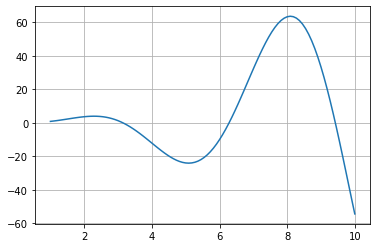

My algorithm: x =  3.1415927410125732
Embedded method: x =  3.1415929794311523


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco

# find a sign of a number with accuracy = eps
def sign(x, eps):
    return x >= eps

def bisection(f, a, b, eps):
    if sign(f(a), eps) == sign(f(b), eps):
        raise ValueError("no solution on this interval")
    
    x = (a + b) / 2 
    while(abs(f(x)) >= eps):
        if sign(f(a), eps) != sign(f(x), eps):
            b = x
        else:
            a = x
        x = (a + b) / 2
    
    return x

# make a function
x = np.linspace(1, 10, 100)
f = lambda x: x**2*np.sin(x)
plt.plot(x, f(x))
plt.grid()
plt.show()

# interval
a = 2
b = 4
try:
    print("My algorithm: x = ", bisection(f, a, b, 1e-6))
    print("Embedded method: x = ", sco.bisect(f, a, b, xtol=1e-6))
    
except ValueError as err:
    print("ValueError: " + str(err))

## Iterative methods

## 2. Newton's method or tangent method

Using the fixed-point iteration method $ x = \varphi(x) = x - \lambda(x)f(x) $,  
where $ \lambda(x) $ takes the optimal value: $ \lambda(x) = \frac{1}{f'(x)} $,  
we make an iterative procedure: $ x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}, x_0 = a $

Method converges, if $ f'(x) $ exists and  $ f'(x) \ne 0 ; ~ \left|\frac{1}{f'_{x}(x)}\right| \le C_1; ~ |f_{xx}^{"}(x)| \le C_2 $ on $ I = [a,b]; ~ C_1^2 C_2 |f(x_0)| < 1 $

It's worth to notice that not all start values lead to correct result. The process can diverge if there was too big or too small value.

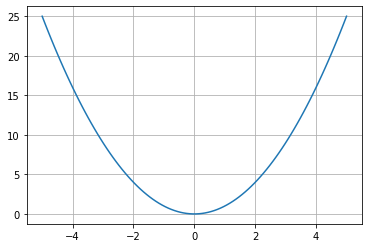

Newton's algorithm: x =  -0.0009765625


In [3]:
import sympy as sp

def Newton(f, der, a, eps):
    x = a
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return None
        
        x = x - f(x) / der(x)
        if abs(f(x)) < eps:
            break
        counter += 1
    return x

# test
f = lambda x : x**2
der = lambda x : 2*x

x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.grid()
plt.show()

a = -1
b = 1
print("Newton's algorithm: x = ", Newton(f, der, a, 1e-6))

## 3. Secant method

If one doesn't want to calculate the derivative of the function, this method can be used.  
The derivative calculated by the formula $ f'(x) = \frac{f(x_{k}) - f(x_{k-1})}{x_{k} - x_{k-1}} $ with accuracy = $O(h)$  

So we make iterative procedure $ x_{k+1} = x_k - f(x_k)\frac{x_{k} - x_{k-1}}{f(x_{k}) - f(x_{k-1})}, x_0 = a $

Process can be ended, when $ |x_{k}-x_{k-1}| < \varepsilon $. Then $ x_k $ is a solution.

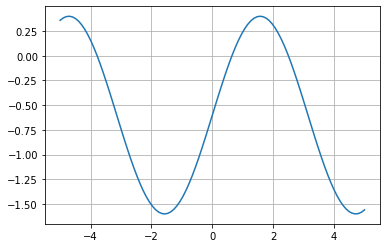

Secant algorithm: x =  0.6435011087861244
Embedded method: x =  0.6435003280639648


In [4]:
def secant(f, der, a, eps):
    x_prev = a
    x = a + eps
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return None
        
        x, x_prev = x - f(x)*(x-x_prev) / (f(x)-f(x_prev)) , x
        if abs(x - x_prev) < eps:
            break
        counter += 1
    return x

# test
f = lambda x : np.sin(x) - 0.6

x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.grid()
plt.show()

a = 0
b = 1
print("Secant algorithm: x = ", secant(f, der, a, 1e-6))
print("Embedded method: x = ", sco.bisect(f, a, b, xtol=1e-6))

## 4. One tangent method

To reduce the number of using the derivative, one can use only the value $ f'(a) $ in the initial point $ x_0 = a $.  
So $ x_{k+1} = x_k - \frac{f(x_k)}{f'(a)}, x_0 = a $

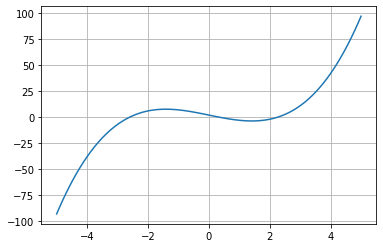

One tangent algorithm: x =  0.33987688661275006
Embedded method: x =  0.3398771286010742


In [5]:
def tangent(f, der_a, a, eps):
    x = a
    der_a = der(a)
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return None
        
        x = x - f(x) / der_a
        if abs(f(x)) < eps:
            break
        counter += 1
    return x

# test
f = lambda x : x**3 - 6*x + 2
der = lambda x : 3*x**2 - 6

x = np.linspace(-5, 5, 100)
plt.plot(x, f(x))
plt.grid()
plt.show()

a = 0
b = 1
print("One tangent algorithm: x = ", Newton(f, der, a, 1e-6))
print("Embedded method: x = ", sco.bisect(f, a, b, xtol=1e-6))

## System of non-linear equations

## 5. Newton method

We want to solve a system
$$ 
\begin{cases}
   f_1(x_1 \ldots x_n) = 0 \\
   \ldots \\
   f_n(x_1 \ldots x_n) = 0
 \end{cases}
$$
Make an iterative procedure, using the Taylor series:
$$ 
\begin{cases}
   f_1^{k+1} = f_1^k + \left(\frac{\partial f_1}{\partial x_1}\right)^k \Delta_1^k + \ldots + \left(\frac{\partial f_1}{\partial x_n}\right)^k \Delta_k^k \\
   \ldots \\
   f_n^{k+1} = f_n^k + \left(\frac{\partial f_n}{\partial x_1}\right)^k \Delta_1^k + \ldots + \left(\frac{\partial f_n}{\partial x_n}\right)^k  \Delta_n^k
 \end{cases}
$$

To find $ \Delta_i^i $, one have to solve a linear system $ J^k\Delta^k = -f^k $, where $J$ is a Jacobi matrix with substitution $ x = x^k $:
$$
J = \begin{pmatrix} 
\frac{\partial f_1}{\partial x_1}& \ldots & \frac{\partial f_1}{\partial x_n} \\
\ldots & \ldots & \ldots \\
\frac{\partial f_n}{\partial x_1} & \ldots & \frac{\partial f_n}{\partial x_n} \\
\end{pmatrix}
$$
and $ \Delta^k = x^{k+1} - x^{k} $

So $ x^{k+1} = x^{k} - f^{k} \cdot \left(J^{k}\right)^{-1} $

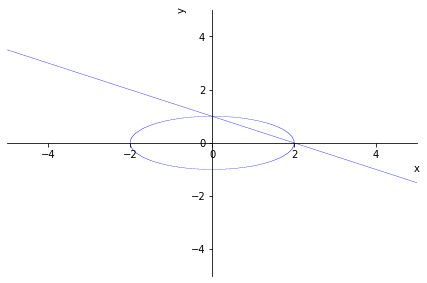

Newton's algorithm: x =  [-7.06144329e-07  1.00000000e+00]
Embedded algorithm: x =  [-2.31776076e-15  1.00000000e+00]


In [74]:
import numpy.linalg as la

# old function for solving linear system
def gradDesc(A, b, eps):
    n = b.size
    x = np.zeros(n)
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return x
        r = A.dot(x) - b
        if la.norm(r, 2) < eps:
            break
        tau = r.dot(r) / A.dot(r).dot(r)
        x = x - tau*r
        counter += 1
    return x


def NewtonSystem(f, J, a, eps):
    n = a.size
    x = a
    counter = 0
    while True:
        if counter > 1000:
            print("the method diverges")
            return x
        
        f_k = np.array(f(x))
        for i in range (n):
            f_k[i] = -f_k[i]
        J_k = np.array(J(x))
                
        delta = gradDesc(J_k, f_k, eps)
        x = x + delta
        if abs(sum(f(x))) < eps:
            break
        counter += 1
    return x

# test
def f(x):
    return [x[0] + 2*x[1] - 2, x[0]**2 + 4*x[1]**2 - 4]
    
def Jacobi(x):
    return [[1, 2], [2*x[0], 8*x[1]]]

x, y = sp.symbols('x y')
plot1 = sp.plot_implicit(sp.Eq(x + 2*y, 2), show=False)
plot2 = sp.plot_implicit(sp.Eq(x**2 + 4*y**2, 4), show=False)
plot1.append(plot2[0])
plot1.show()

a = np.array([0.1, 0.1])
print("Newton's algorithm: x = ", NewtonSystem(f, Jacobi, a, 1e-6))
print("Embedded algorithm: x = ", sco.fsolve(f, a))